In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from src.code.simulation.galton_watson import SimulateurGaltonWatson
from src.code.simulation.probability_distributions import (
    create_distributions,
    create_distributions_df,
)
from src.code.simulation.utils import test_loi_exponentielle
from src.code.simulation.yaglom import simulation_yaglom_toutes_lois
from src.config.config import seed
from src.utils.utils import init_notebook

In [31]:
init_notebook(seed)

# Théorème de Yaglom

## Mise au propre Yaglom

In [3]:
distributions = create_distributions()

In [83]:
alpha = 0.05
nb_processus = 30_000
taille_pas = 2
nb_repetitions = 100

In [23]:
p_value_dict, ks_dict, lambda_dict = simulation_yaglom_toutes_lois(
    distributions,
    nb_processus,
    taille_pas,
    nb_repetitions,
)

In [24]:
p_value_df = pd.DataFrame(p_value_dict)
ks_df = pd.DataFrame(ks_dict)
lambda_df = pd.DataFrame(lambda_dict)

In [25]:
p_value_df.to_csv("data/results/p-value-evolution.csv", index=False)
ks_df.to_csv("data/results/ks-evolution.csv", index=False)
lambda_df.to_csv("data/results/lambda-evolution.csv", index=False)

In [5]:
p_value_df = pd.read_csv("data/results/p-value-evolution.csv")
ks_df = pd.read_csv("data/results/ks-evolution.csv")
lambda_df = pd.read_csv("data/results/lambda-evolution.csv")

In [6]:
distributions_df = create_distributions_df()

In [7]:
lambda_array = np.array(distributions_df["Lambda théorique loi exponentielle Z_n / n"])

## Graphiques

### p-values

#### Toutes les lois de reproduction

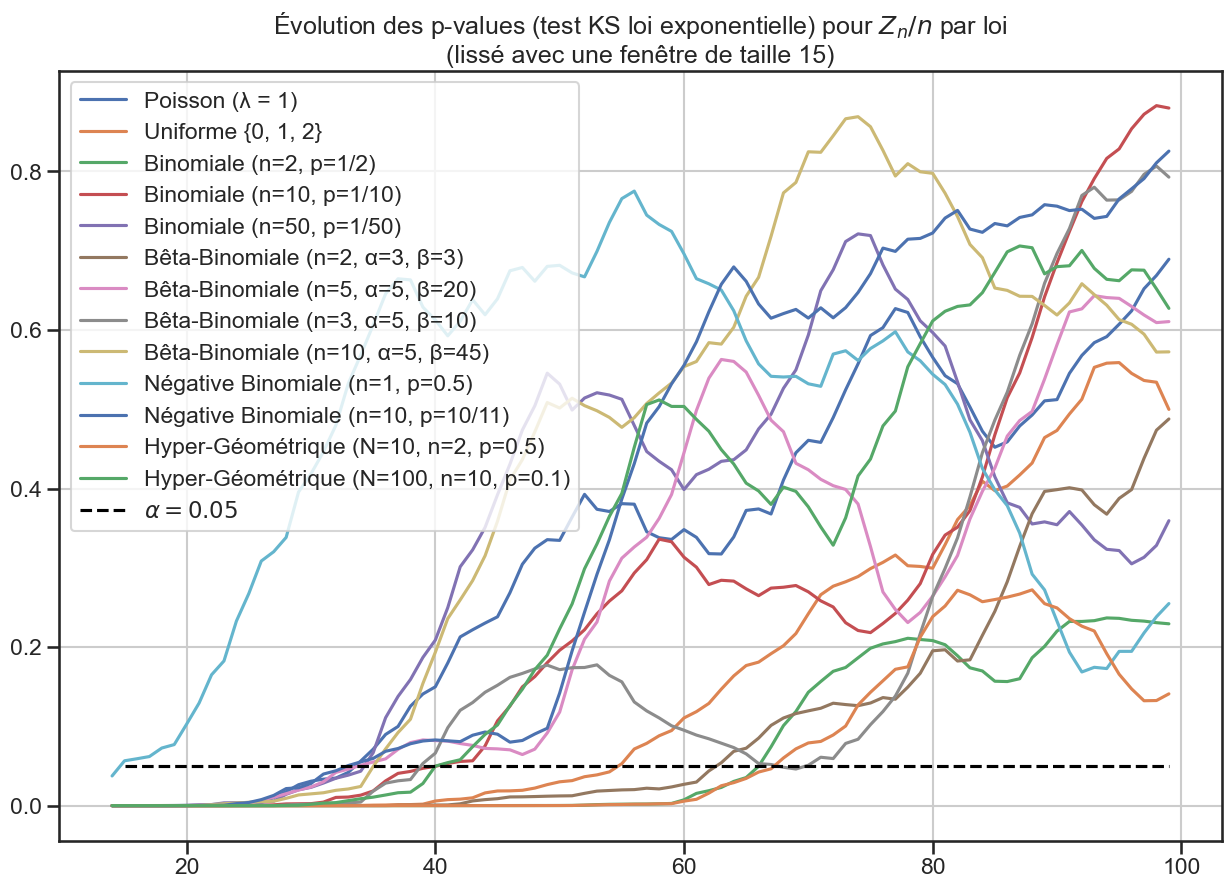

In [87]:
periode_lissage = 15

p_value_df.rolling(window=periode_lissage).mean().plot(figsize=(15, 10))
plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})",
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()
plt.savefig("assets/img/p-values-evolution-all-laws.png")
plt.savefig("assets/img/p-values-evolution-all-laws.svg")

#### Lois de reproduction groupées

In [93]:
groupe1 = [
    "Poisson (λ = 1)",
    "Uniforme {0, 1, 2}",
    "Hyper-Géométrique (N=10, n=2, p=0.5)",
    "Hyper-Géométrique (N=100, n=10, p=0.1)",
]

groupe2 = [
    "Binomiale (n=2, p=1/2)",
    "Binomiale (n=10, p=1/10)",
    "Binomiale (n=50, p=1/50)",
    "Négative Binomiale (n=1, p=0.5)",
    "Négative Binomiale (n=10, p=10/11)",
]

groupe3 = [
    "Bêta-Binomiale (n=2, α=3, β=3)",
    "Bêta-Binomiale (n=5, α=5, β=20)",
    "Bêta-Binomiale (n=3, α=5, β=10)",
    "Bêta-Binomiale (n=10, α=5, β=45)",
]

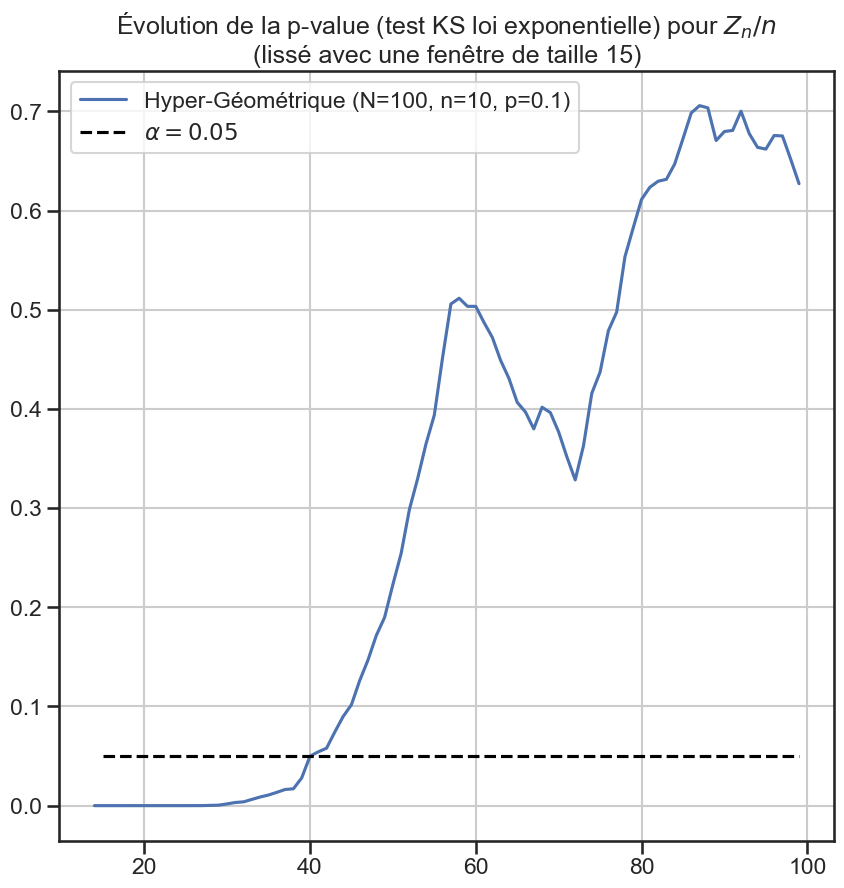

In [121]:
periode_lissage = 15

p_value_df["Hyper-Géométrique (N=100, n=10, p=0.1)"].rolling(
    window=periode_lissage,
).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution de la p-value (test KS loi exponentielle) pour $Z_n / n$"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})",
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()
plt.savefig("data/plots/evolution/p-value-hypergeom.png")

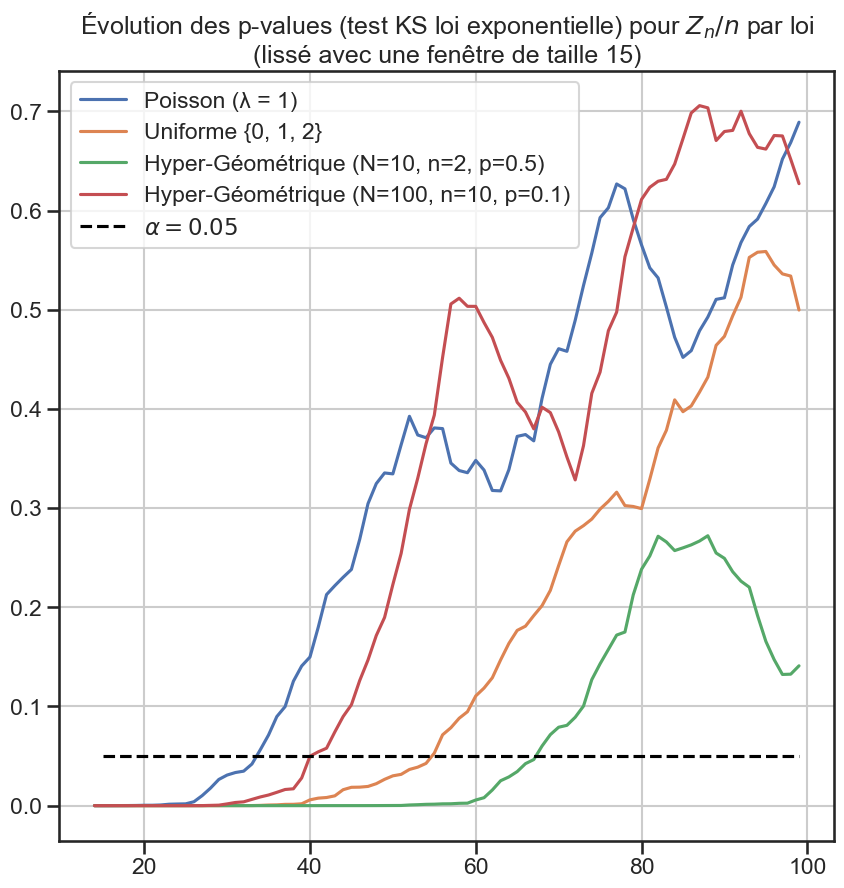

In [94]:
periode_lissage = 15

p_value_df[groupe1].rolling(window=periode_lissage).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})",
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()
plt.savefig("data/plots/evolution/p-value-group1.png")

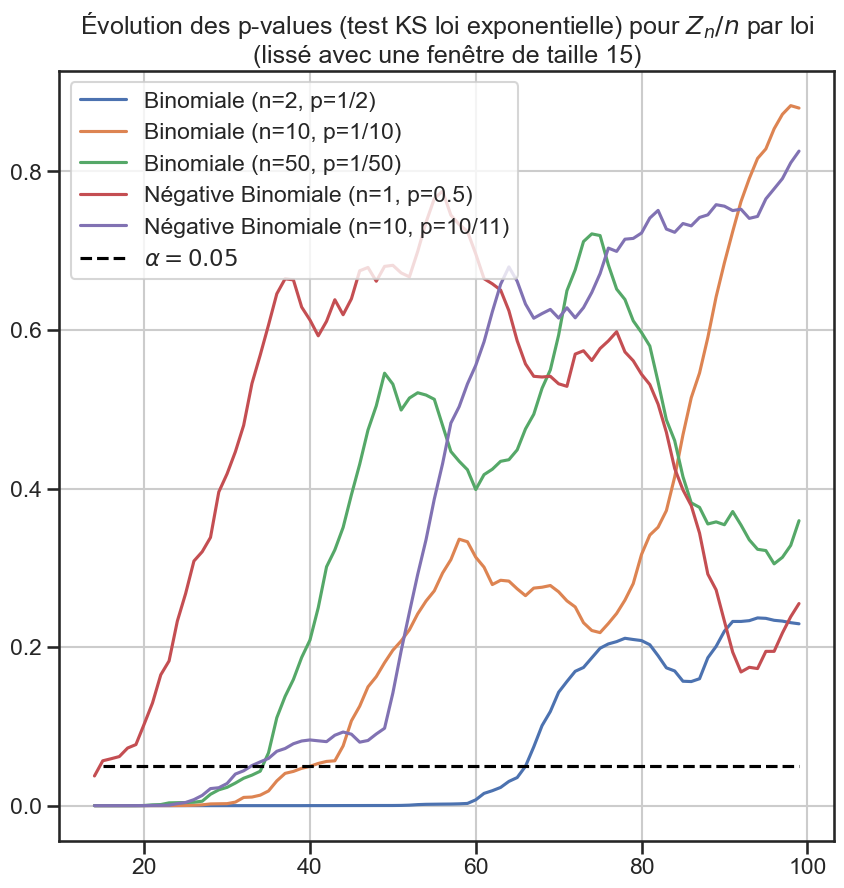

In [95]:
periode_lissage = 15

p_value_df[groupe2].rolling(window=periode_lissage).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})",
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()

plt.savefig("data/plots/evolution/p-value-group2.png")

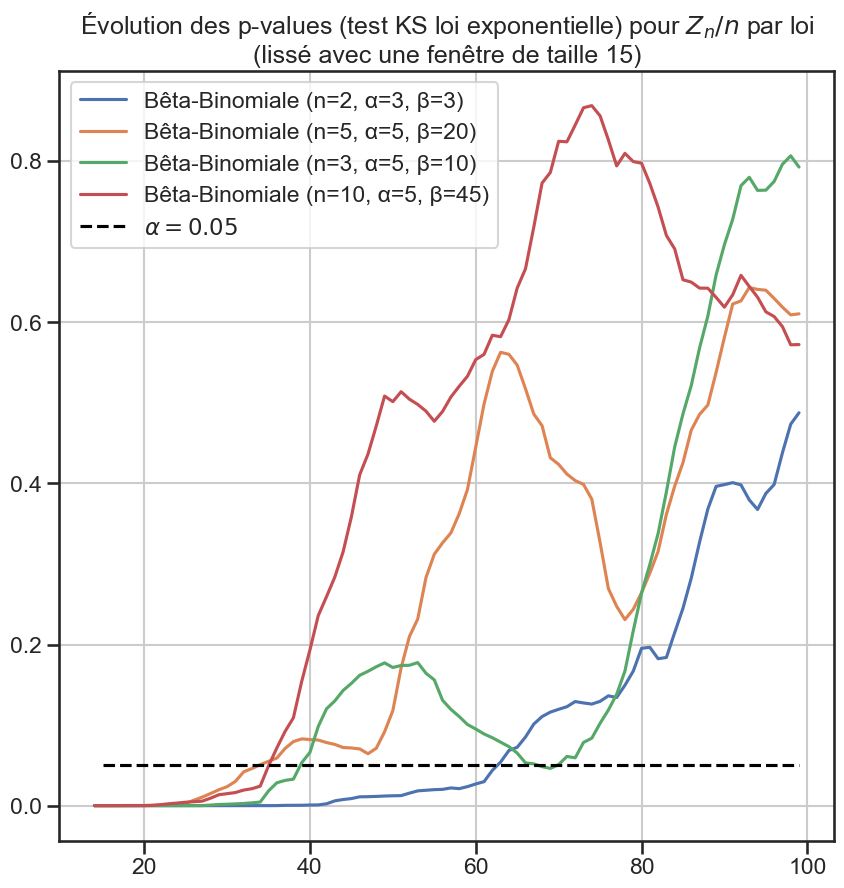

In [96]:
periode_lissage = 15

p_value_df[groupe3].rolling(window=periode_lissage).mean().plot(figsize=(10, 10))

plt.title(
    "Évolution des p-values (test KS loi exponentielle) pour $Z_n / n$ par loi"
    f"\n(lissé avec une fenêtre de taille {periode_lissage})",
)
plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.legend()

plt.savefig("data/plots/evolution/p-value-group3.png")

### Statistique KS

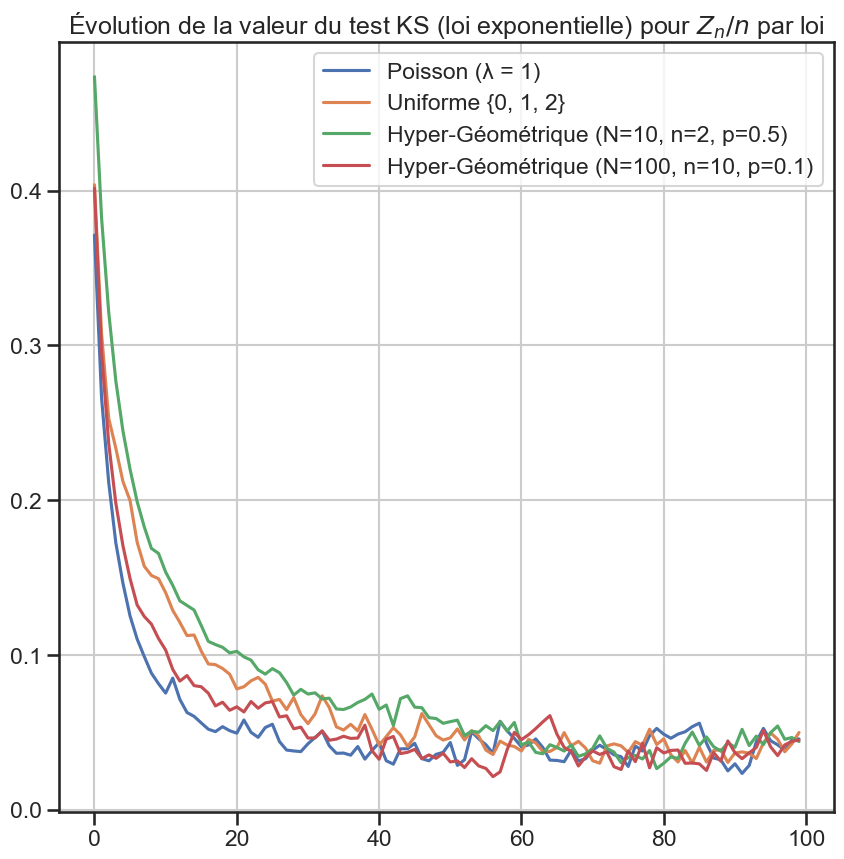

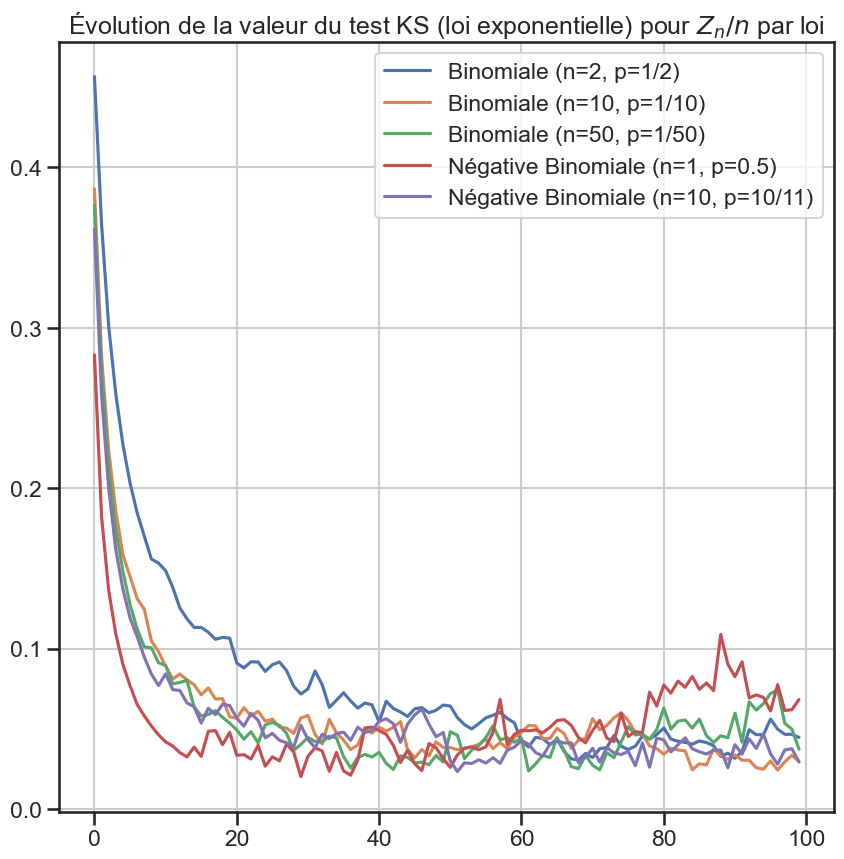

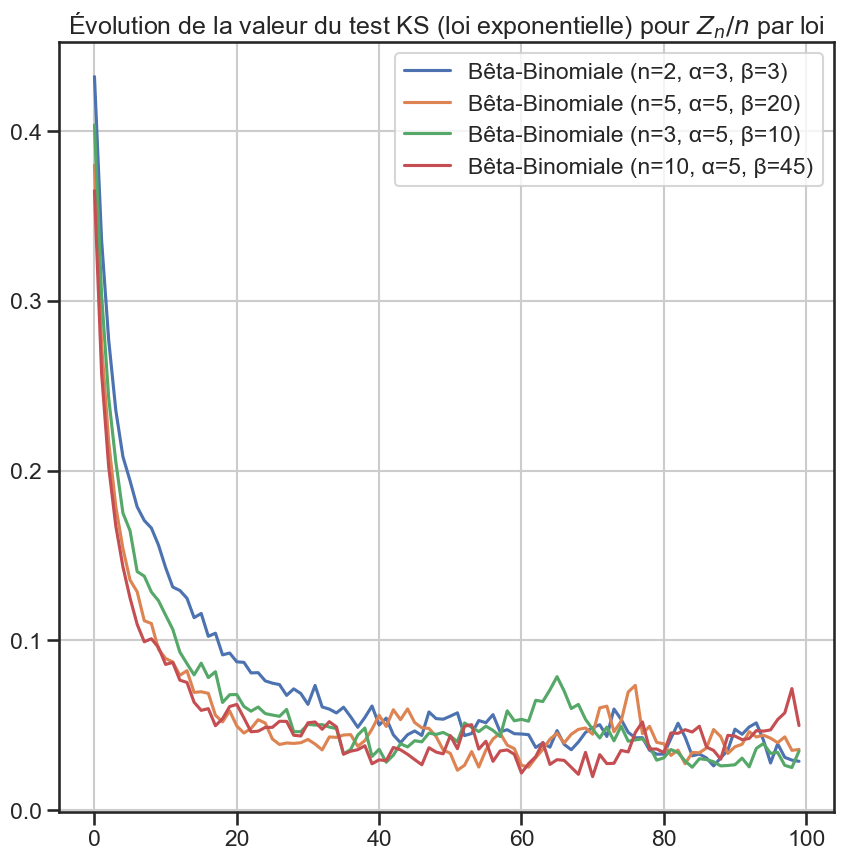

In [115]:
for group_name, group in (
    ("group1", groupe1),
    ("group2", groupe2),
    ("group3", groupe3),
):
    ks_df[group].plot(figsize=(10, 10))

    plt.title(
        "Évolution de la valeur du test KS (loi exponentielle) pour $Z_n / n$ par loi",
    )

    plt.savefig(f"data/plots/evolution/ks-{group_name}.png")

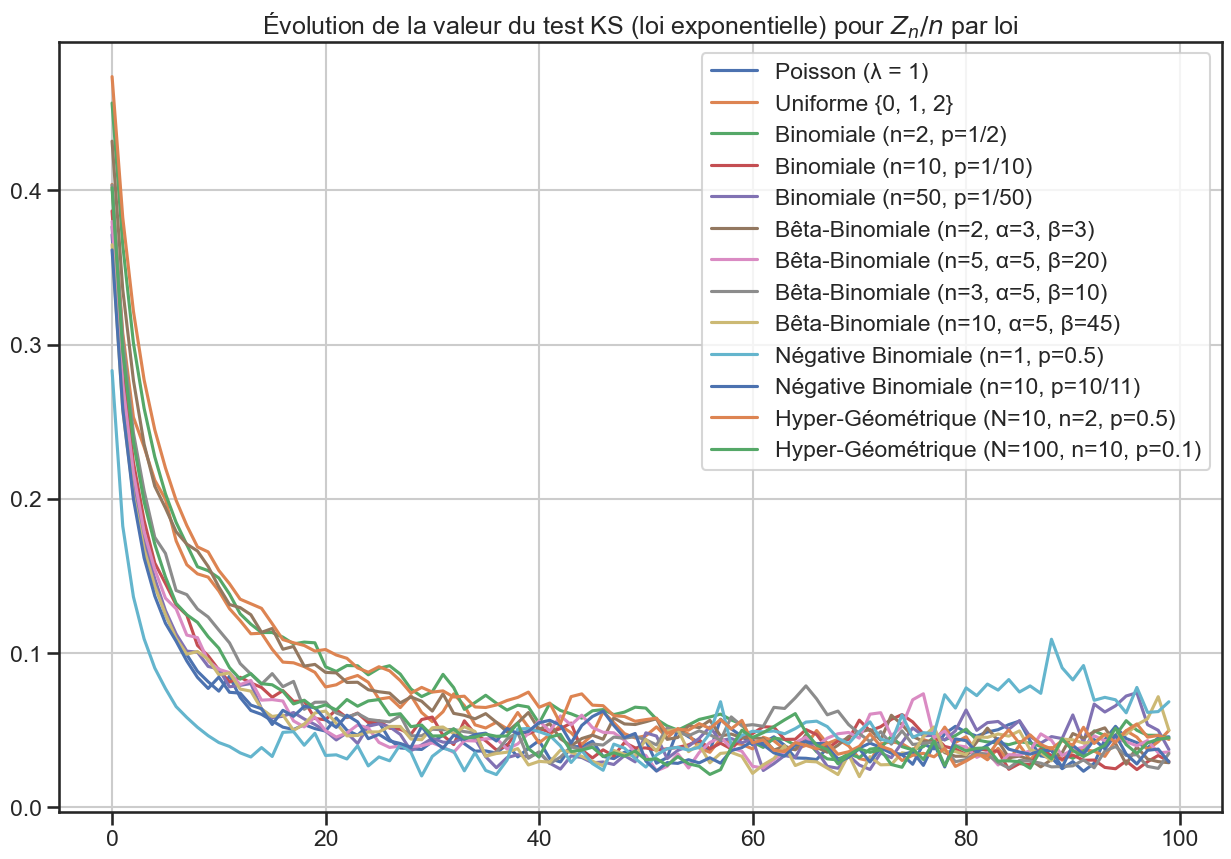

In [98]:
ks_df.plot(figsize=(15, 10))

plt.title(
    "Évolution de la valeur du test KS (loi exponentielle) pour $Z_n / n$ par loi",
)

plt.savefig("data/plots/evolution/ks-all.png")

### Distance au lambda théorique

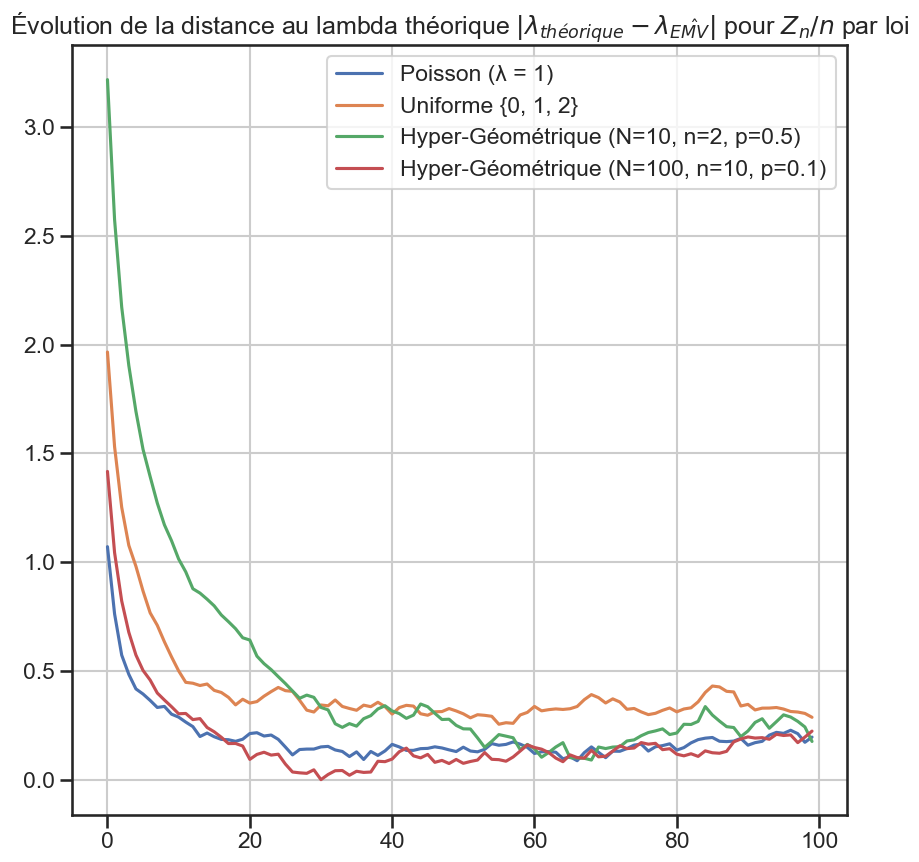

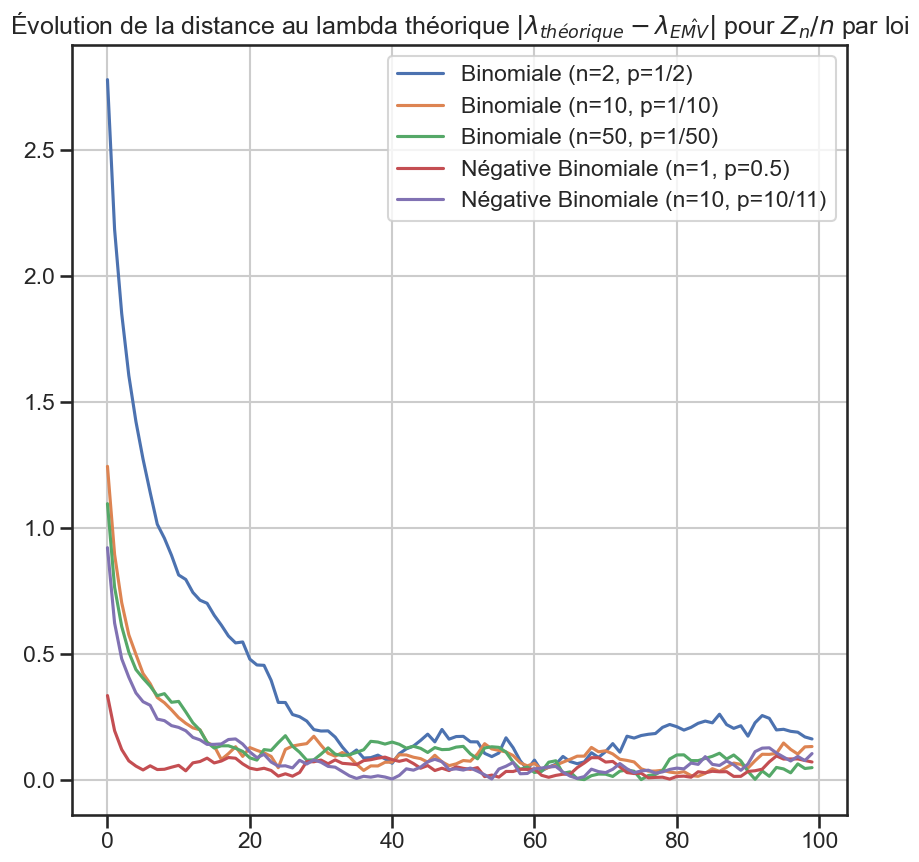

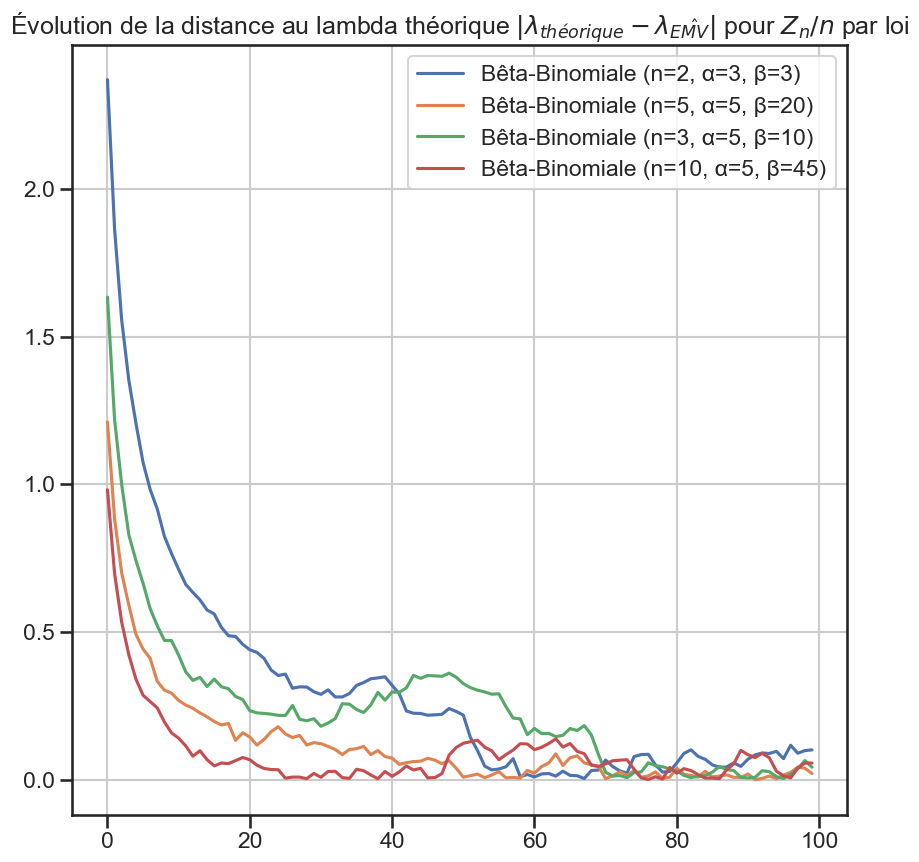

In [116]:
for group_name, group in (
    ("group1", groupe1),
    ("group2", groupe2),
    ("group3", groupe3),
):
    index = [list(lambda_df.columns).index(group[i]) for i in range(len(group))]

    abs(lambda_df[group] - lambda_array[index]).plot(figsize=(10, 10))

    plt.title(
        r"Évolution de la distance au lambda théorique $|\lambda_{théorique} - \lambda_{\hat{EMV}}|$ pour $Z_n / n$ par loi",
    )

    plt.savefig(f"data/plots/evolution/lambda-distance-{group_name}.png")

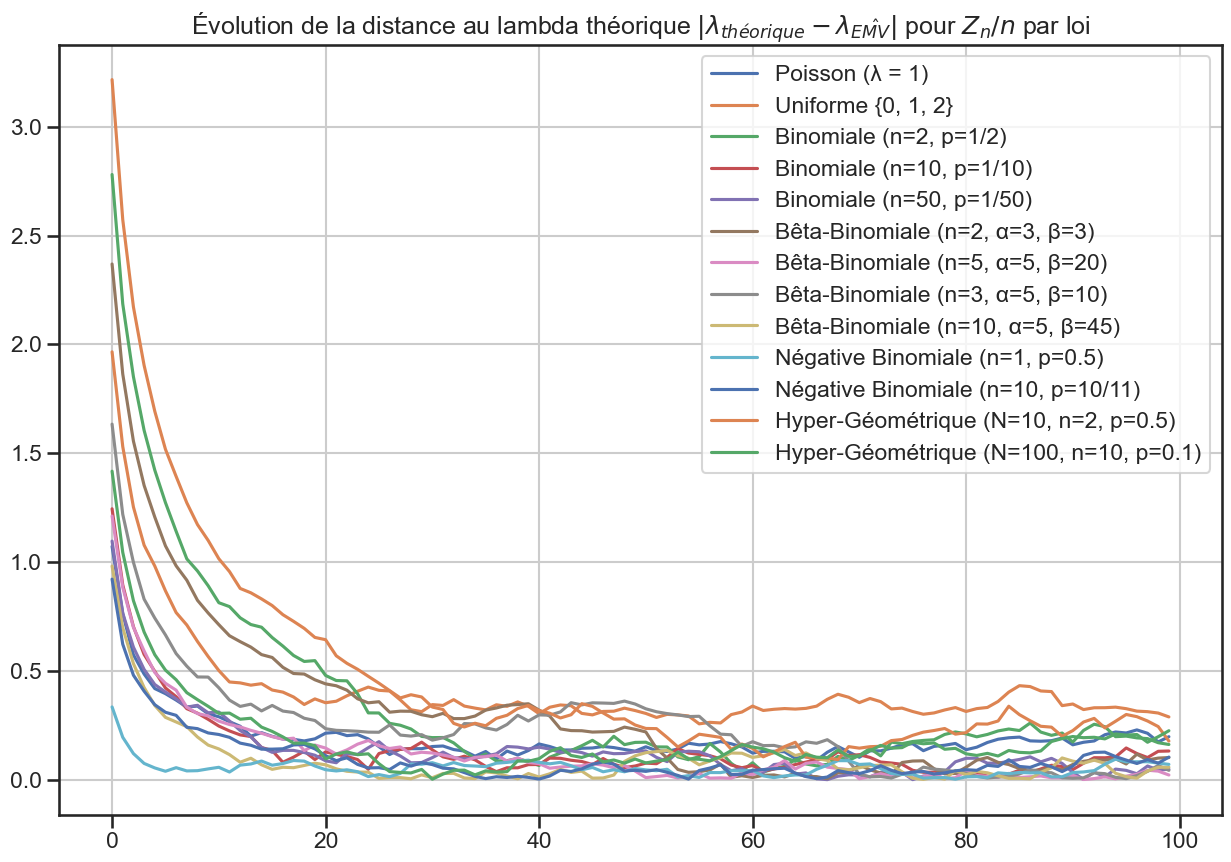

In [97]:
abs(lambda_df - lambda_array).plot(figsize=(15, 10))

plt.title(
    r"Évolution de la distance au lambda théorique $|\lambda_{théorique} - \lambda_{\hat{EMV}}|$ pour $Z_n / n$ par loi",
)

plt.savefig("data/plots/evolution/lambda-distance-all.png")

### Évolution de la distribution

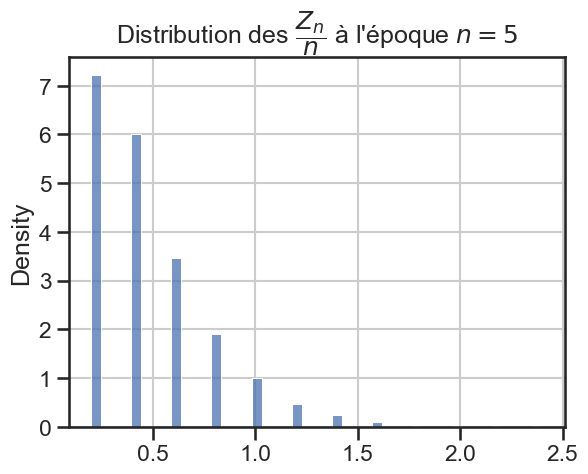

p_value = 0.0


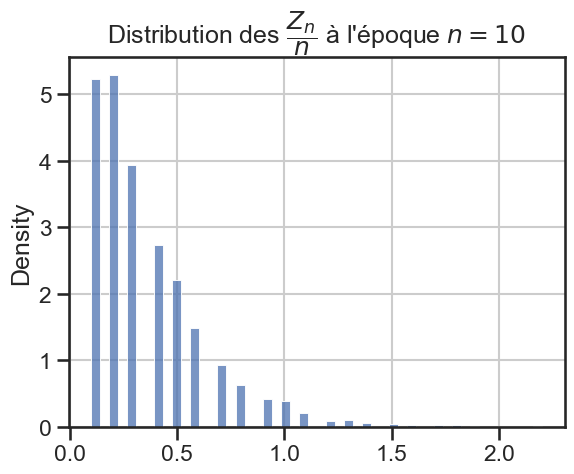

p_value = 9.622011434558595e-152


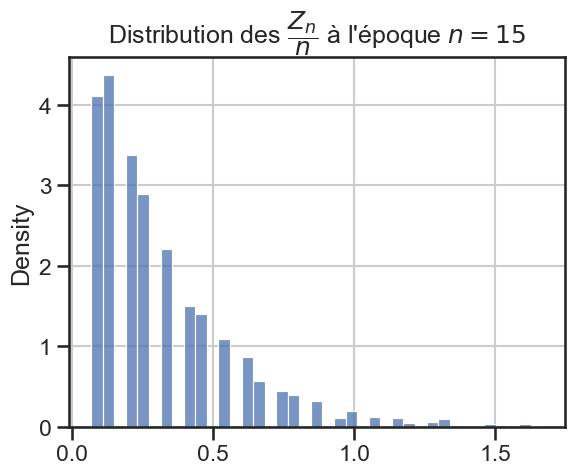

p_value = 2.827435930932723e-70


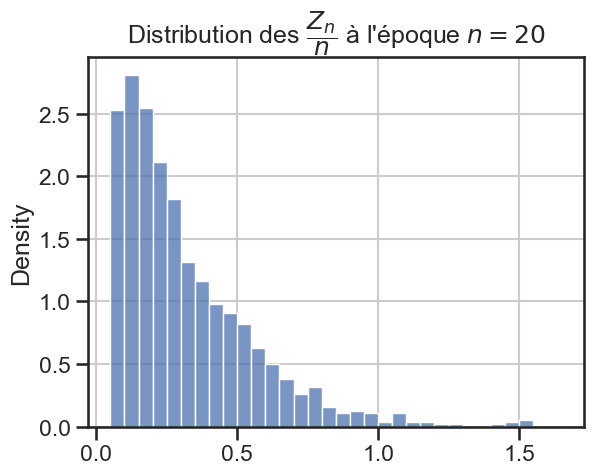

p_value = 2.8210546622397323e-39


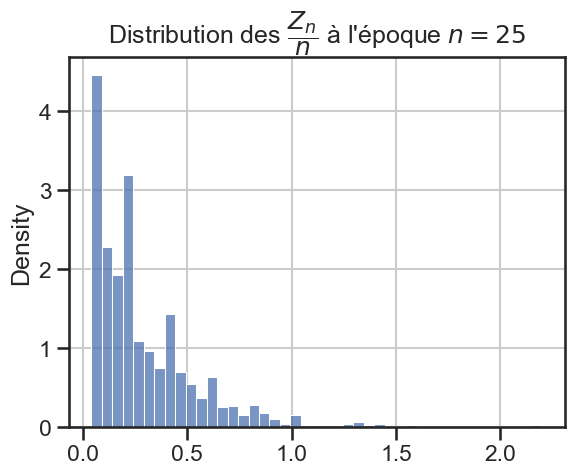

p_value = 3.2216117932465623e-24


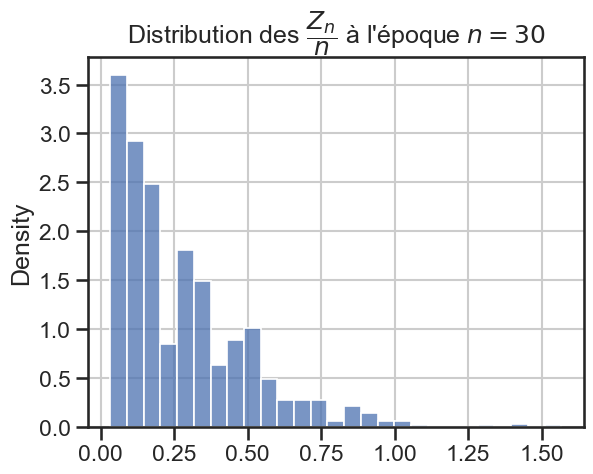

p_value = 7.887052073352042e-20


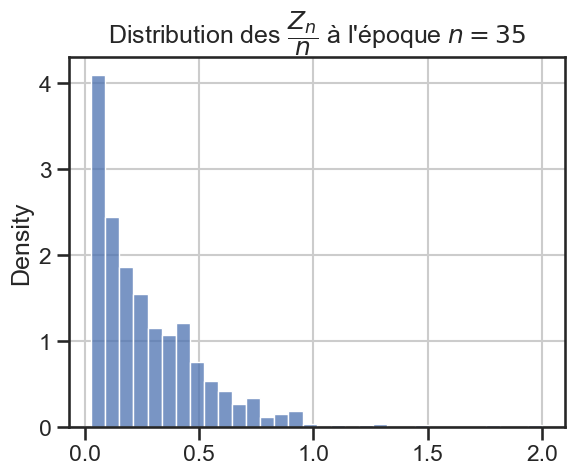

p_value = 3.461167774975927e-12


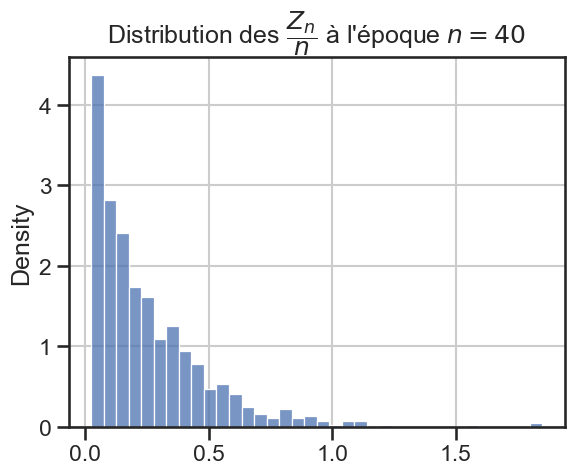

p_value = 1.7994986428624622e-12


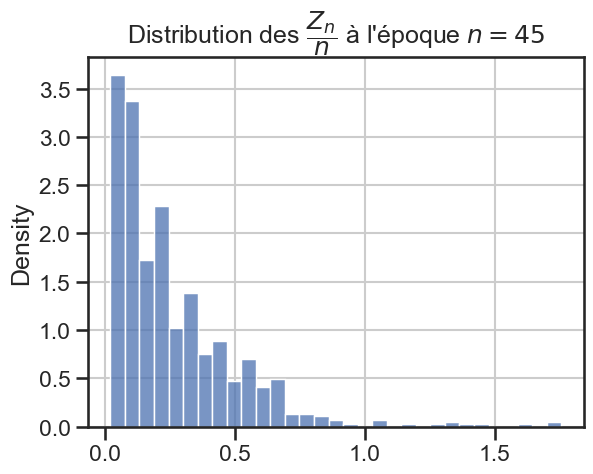

p_value = 7.08994488987903e-08


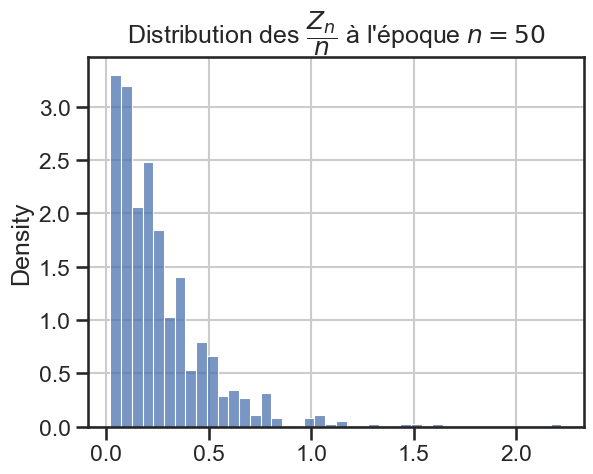

p_value = 3.728747180083857e-08


In [43]:
sim = SimulateurGaltonWatson(
    distributions["Hyper-Géométrique (N=10, n=2, p=0.5)"],
    nb_processus=10_000,
)
taille_pas = 5
nb_repetitions = 10
taille_echantillon = 100

for i in range(nb_repetitions):
    sim.simule(nb_epoques=taille_pas)
    sim.retire_processus_eteints()

    zn_sur_n = sim.get_zn_sur_n()
    zn_sur_n_sample = zn_sur_n[taille_echantillon:]

    plt.title(
        r"Distribution des $\dfrac{Z_n}{n}$ à l'époque $n = "
        + str((i + 1) * taille_pas)
        + "$",
    )
    sns.histplot(zn_sur_n_sample, stat="density")
    plt.savefig(f"data/results/distribution/hyper-geo-{(i + 1) * taille_pas}.png")
    plt.show()

    p_value, statistique_ks = test_loi_exponentielle(zn_sur_n)
    print(f"{p_value = }")

### Graphique transparent (pour le style)

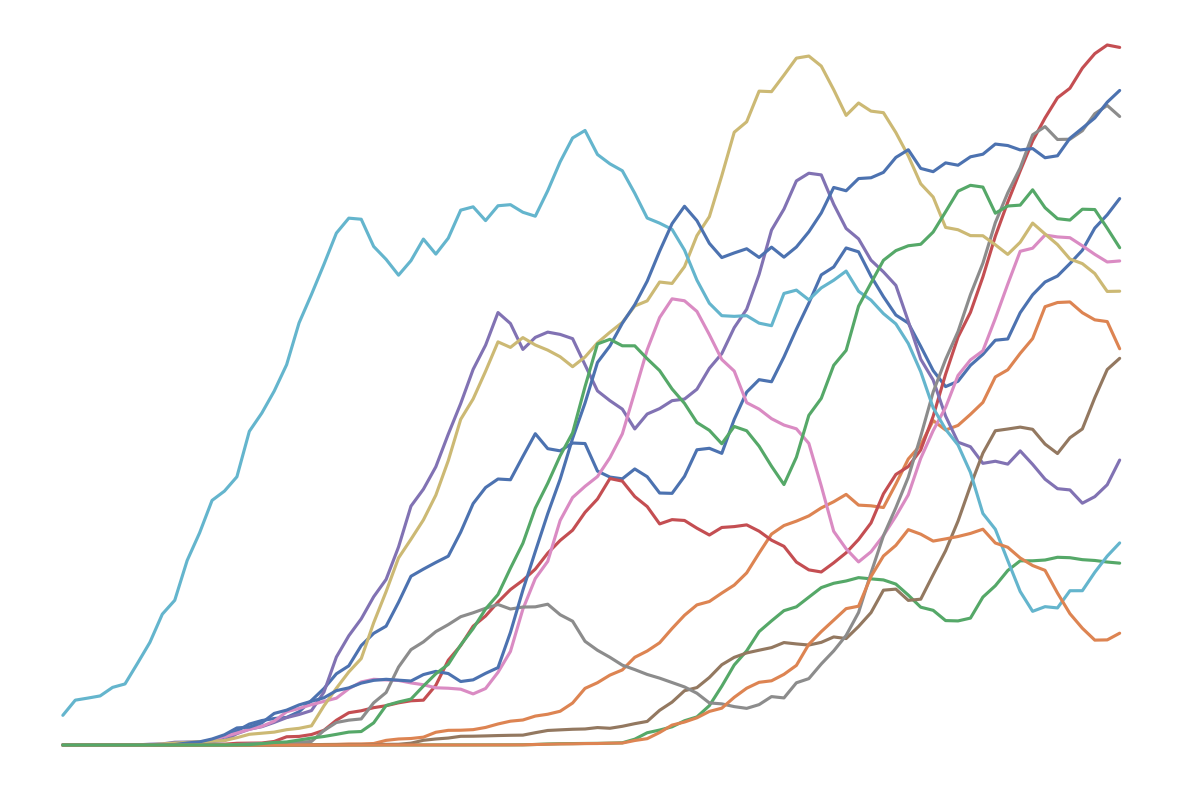

In [55]:
periode_lissage = 15
p_value_df.rolling(window=periode_lissage).mean().plot(figsize=(15, 10), legend=None)

plt.plot(
    list(range(periode_lissage, nb_repetitions)),
    [alpha for _ in range(periode_lissage, nb_repetitions)],
    label=r"$\alpha = 0.05$",
    color="black",
    linestyle="dashed",
)
plt.grid(False)

# Remove both x and y axes
plt.axis("off")
# Hide major ticks and labels on the x-axis
plt.tick_params(axis="x", which="major", length=0, labelbottom=False)

# Hide major ticks and labels on the y-axis
plt.tick_params(axis="y", which="major", length=0, labelleft=False)
# plt.savefig("assets/img/p-values-evolution-all-laws.svg")

plt.savefig("assets/img/p-values-evolution-all-laws-transparent.png", transparent=True)